- Kemil Herath 
- MIS 776
- Assignment 04 (Classification)

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline 

### 2. Using Python, read the contents of the file into a variable called datBank.

In [323]:
datBank = pd.read_csv('BankSet.csv')

In [324]:
datBank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,purchase
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown,no


#### 2.1 What is the mean loan balance for the customers in our data set? 

In [325]:
mean_loan_balance = datBank['balance'].mean()

print('Mean Loan Balance is: ${:.2f}'.format(mean_loan_balance))

Mean Loan Balance is: $1422.66


#### 2.2 What is the average number of contacts that have been made to a customer in this campaign?

In [411]:
mean_contacts_current = datBank['campaign'].mean()

print('Average Number of contacts made to a customer this campaign: {:.2f} '.format(mean_contacts_current))

Average Number of contacts made to a customer this campaign: 2.79 


### 3. Create a histogram for loan balance (balance). 

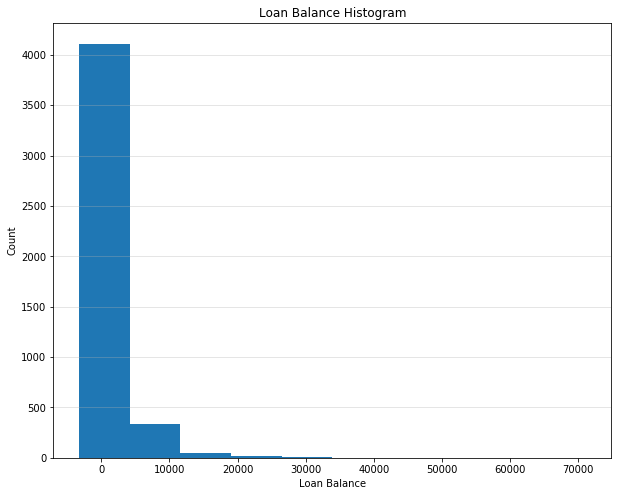

In [327]:
plt.figure(figsize=(10,8))

plt.hist(datBank.balance)
plt.grid(axis = 'y', alpha = 0.4)
plt.xlabel('Loan Balance')
plt.ylabel('Count')
plt.title('Loan Balance Histogram')

plt.show();

#### 3.1 Is the distribution normal? Is it skewed?

- The distribution is not Normal
- It is right skewed 

### 4. Repeat the above for customer age.

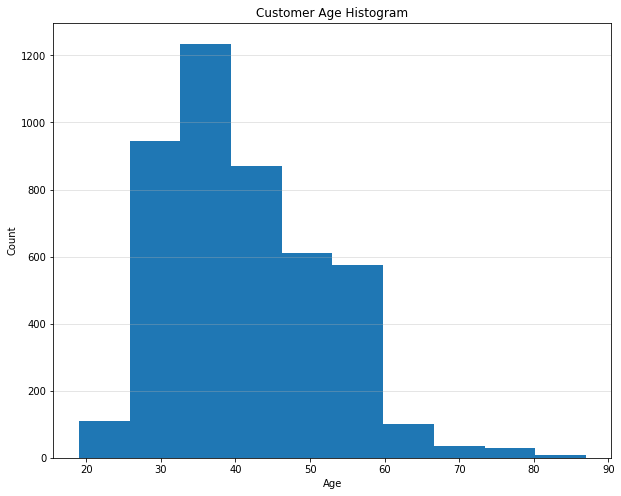

In [328]:
plt.figure(figsize=(10,8))

plt.hist(datBank.age)
plt.grid(axis = 'y', alpha = 0.4)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Customer Age Histogram')

plt.show();

#### 4.1 Is the distribution normal? Is it skewed?
- This distribution is not Normal. 
- it is also right skewed. 

### 5. Add a new column to your data set called purchase_code, which is a numeric value where 0 indicates that   the customer did not purchase in the current campaign and 1 if they did purchase. As a check, the mean value of the new purchase_code column should be 0.1152, indicating that 11.52% of the customers did purchase the term deposit product.

In [329]:
## Get dummy variables for Purchase Variable 
datBank = pd.concat([datBank, pd.get_dummies(datBank['purchase']=='yes',prefix='pur', drop_first=True)], axis=1)

In [330]:
## Rename the new columns
datBank.rename(columns={'pur_True': 'purchase_code'}, inplace=True)

In [331]:
datBank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,purchase,purchase_code
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,no,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,5,-1,0,unknown,no,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,1,-1,0,unknown,no,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,11,-1,0,unknown,no,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,4,211,3,other,no,0


In [332]:
datBank.purchase_code.mean()

0.11523999115239991

### 6. Create a correlation table for all of the numeric values in the data set (age, balance, campaign, pdays, previous, purchase_code). 

In [333]:
numeric_values = ['age', 'balance','campaign','pdays','previous','purchase_code']

datBank[numeric_values].corr()

,age,balance,campaign,pdays,previous,purchase_code
age,1.000000,0.083820,-0.005148,-0.008894,-0.003511,0.045092
balance,0.083820,1.000000,-0.009976,0.009437,0.026196,0.017905
campaign,-0.005148,-0.009976,1.000000,-0.093137,-0.067833,-0.061147
pdays,-0.008894,0.009437,-0.093137,1.000000,0.577562,0.104087
previous,-0.003511,0.026196,-0.067833,0.577562,1.000000,0.116714
purchase_code,0.045092,0.017905,-0.061147,0.104087,0.116714,1.000000


#### 6.1 Which numeric value is the most correlated with purchase_code? Which is the least correlated? 

In [334]:
datBank[numeric_values].corr()['purchase_code'].sort_values(ascending = False)

purchase_code    1.000000
previous         0.116714
pdays            0.104087
age              0.045092
balance          0.017905
campaign        -0.061147
Name: purchase_code, dtype: float64

- The **most correlated** with purchase_code is **previous**
- The **least correlated** with  purchase_code is **balance**

#### 6.2 Why is this important (why do we care about this)?

- Correlateion tells us the relationship between 2 variables. 
- Correlation indicates the influence of having or not having a particular variable on another variable.
- Predictor variables that are highly correlated to the target variable leads to more accurate models.  

### 7. Generate aggregates of purchase_code for the following categorical predictors: job, marital, education, housing, loan, poutcome.

In [335]:
# Job Variable
datBank['purchase_code'].groupby(datBank['job']).mean().sort_values(ascending=False)

job
retired          0.234783
student          0.226190
unknown          0.184211
management       0.135191
housemaid        0.125000
admin.           0.121339
self-employed    0.109290
technician       0.108073
unemployed       0.101562
services         0.091127
entrepreneur     0.089286
blue-collar      0.072939
Name: purchase_code, dtype: float64

In [336]:
## Define a function to get aggregate values from different categorical variables 
def agg_func(df,target,variable):
    return df[target].groupby(datBank[variable]).mean().sort_values(ascending=False)

In [337]:
# marital variable 
agg_func(datBank, 'purchase_code', 'marital')

marital
divorced    0.145833
single      0.139632
married     0.099035
Name: purchase_code, dtype: float64

In [338]:
# education variable 
agg_func(datBank, 'purchase_code', 'education')

education
tertiary     0.142963
secondary    0.106245
unknown      0.101604
primary      0.094395
Name: purchase_code, dtype: float64

In [339]:
# Housing variable 
agg_func(datBank, 'purchase_code', 'housing')

housing
no     0.153415
yes    0.085971
Name: purchase_code, dtype: float64

In [340]:
# Loan variable 
agg_func(datBank, 'purchase_code', 'loan')

loan
no     0.124804
yes    0.062229
Name: purchase_code, dtype: float64

In [341]:
# pOutcome variable 
agg_func(datBank, 'purchase_code', 'poutcome')

poutcome
success    0.643411
other      0.192893
failure    0.128571
unknown    0.090958
Name: purchase_code, dtype: float64

#### 7.1 Do any of these categorical predictors seem to have a high explanatory value for purchase_code? If so, which ones and why do you feel that this might be important?

- **poutcome** variable seems to have the highest explanatory value for purchase_code
- **job** varibale consits of the second highest values
- Other variables seems to have small values 


- Job category
    - On average retired people and students seems to have made more purchases
    - It does make sence for retired people to purchase more term deposits.
    - Most student employment does not offer any investment options. That could be a reason for students to purchase term deposits. However, most students tend to have student debt and less income. Given that 23% average seems reasonable. 
    
- poutcome
    - The sucess category on average has a high explanatory value for purchase_code. This makes sence becuase,we can assue that a person who purchased previousely is more likely to purchase again. Hence, the high value with sucess category does make sence.  

### 8. Pick one of the categorical predictors that you think should have the greatest impact on purchase. Use one-hot encoding to transform this categorical variable into numeric values for analysis.

I strongly believe **poutcome** variable has the greatest impact on purchase. 

In [342]:
datBank.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

- poutcome has 4 categories as displayed above. 

In [343]:
datBank = pd.concat([datBank,pd.get_dummies(datBank['poutcome'], prefix='prev', drop_first=True)], axis=1)

In [344]:
datBank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,purchase,purchase_code,prev_other,prev_success,prev_unknown
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,no,0,0,0,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,no,0,0,0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,no,0,0,0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,no,0,0,0,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown,no,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,5,-1,0,unknown,no,0,0,0,1
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,1,-1,0,unknown,no,0,0,0,1
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,11,-1,0,unknown,no,0,0,0,1
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,4,211,3,other,no,0,1,0,0


### 9. Store the columns that are numeric and the ones that you one-hot encoded into a data set called ‘X’. 
- This will be the feature data set. This should contain only numeric values and it should not contain purchase_code.

In [345]:
numeric_values

['age', 'balance', 'campaign', 'pdays', 'previous', 'purchase_code']

In [346]:
# Grab all the new dummy variables
new_features = ['prev_other','prev_success','prev_unknown']
numeric_values = numeric_values + new_features
numeric_values

['age',
 'balance',
 'campaign',
 'pdays',
 'previous',
 'purchase_code',
 'prev_other',
 'prev_success',
 'prev_unknown']

In [347]:
X = datBank[numeric_values]

In [348]:
X.head()

,age,balance,campaign,pdays,previous,purchase_code,prev_other,prev_success,prev_unknown
0,30,1787,1,-1,0,0,0,0,1
1,33,4789,1,339,4,0,0,0,0
2,35,1350,1,330,1,0,0,0,0
3,30,1476,4,-1,0,0,0,0,1
4,59,0,1,-1,0,0,0,0,1


In [349]:
## Drop the purchase_code variable 
X = X.drop('purchase_code',axis=1)
X.head()

,age,balance,campaign,pdays,previous,prev_other,prev_success,prev_unknown
0,30,1787,1,-1,0,0,0,1
1,33,4789,1,339,4,0,0,0
2,35,1350,1,330,1,0,0,0
3,30,1476,4,-1,0,0,0,1
4,59,0,1,-1,0,0,0,1


### 10. Store the purchase_code values in a data set called ‘y’. This will be the target data set that you are trying to predict.

In [350]:
y = datBank['purchase_code']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: purchase_code, dtype: uint8

### 11. Randomly partition the rows into training and validation set using a random seed of 500. Put 70% into the training partition and 30% into the testing partition.

In [351]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=500)

In [352]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (3164, 8)
X_test:  (1357, 8)
y_train:  (3164,)
y_test:  (1357,)


### 12. Apply a decision tree classifier to the training data to create a model. Calculate the Accuracy % of the model as a whole.

In [353]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the mdoel 
dt = DecisionTreeClassifier(max_depth=3)
# fit the model 
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [354]:
# Prediction from training set 
y_pred_train = dt.predict(X_train)

In [355]:
# Calculat the accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred_train)
print('Model accuracy: {:.0f}%'.format(accuracy * 100))

Model accuracy: 89%


#### 12.1 Create a confusion matrix and calculate the Precision, Recall, and F-Measure for each purchase class (yes and no). 

In [356]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_pred_train)

array([[2762,   36],
       [ 297,   69]])

In [369]:
y_train.value_counts()

0    2798
1     366
Name: purchase_code, dtype: int64

In [371]:
pd.crosstab(y_train, y_pred_train, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2762,36,2798
1,297,69,366
All,3059,105,3164


In [372]:
from sklearn.metrics import precision_score
pres = precision_score(y_train, y_pred_train, average=None)
pres

array([0.90290945, 0.65714286])

In [373]:
from sklearn.metrics import recall_score
rec = recall_score(y_train, y_pred_train,average=None)
rec

array([0.98713367, 0.18852459])

In [374]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred_train, average=None)

array([0.94314495, 0.29299363])

#### 12.2 Since the distribution of yes to no in this set is 11.5%, how well do you feel that this model does at predicting campaign purchasers? 

- Althought the accuracy score is 89%, the model is not predicting the purchasers well.
- The model seems to be classifying both classes pretty well given the disproportionate distribution of data. This evident in the precision score.  
- The model performs poorly when it comes to predicting actual purchasers and this is evedant in the recall score. 
- However, the model seems to be predicting non-purchasers very highly in both occations.  
- The predictive ability of non purchasers is much stronger than the predictive ability of purchasers.  
- This could be due to the high disproportionality of data.  

#### 12.3 What is the primary predictor? Do you think that using this predictor exclusively might be potentially problematic?

In [397]:
pd.Series(data = dt.feature_importances_, index = X_train.columns).sort_values(ascending = False).round(3)

prev_success    0.703
pdays           0.124
age             0.123
balance         0.051
prev_unknown    0.000
prev_other      0.000
previous        0.000
campaign        0.000
dtype: float64

- The primary predictor seems to be the sucessful outcome of previous campaign (prev_success). 
- This was pretty eveidant previousely when we looked at aggregation data. This result confirms the aggration result. 
- This predictor is **extremely strong** in predicting the purchasers, so getting rid of this predictor will significantlt negatively affect the accuracy and the predictability of the model. 
- In other words this is s **must-use** predictor

### 13. Use validation partition to run predictions on the model and generate a confusion matrix on the test set.

In [378]:
y_pred_test = dt.predict(X_test)

In [379]:
# Confusion Matris 
confusion_matrix(y_test, y_pred_test)

array([[1183,   19],
       [ 130,   25]])

In [380]:
pd.crosstab(y_test, y_pred_test, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1183,19,1202
1,130,25,155
All,1313,44,1357


In [383]:
# Accuracy of testing data 
acc_pred = accuracy_score(y_test,y_pred_test)
print('Model testing accuracy: {:.0f}%'.format(acc_pred * 100))

Model testing accuracy: 89%


In [384]:
# Presicion and Recall 
pres_test = precision_score(y_test, y_pred_test, average=None)
rec_test = recall_score(y_test, y_pred_test, average=None)

print('Precision: ', pres_test)
print('recall: ', rec_test)

Precision:  [0.9009901  0.56818182]
recall:  [0.98419301 0.16129032]


In [385]:
# F-1 score 
f1_score(y_test, y_pred_test, average=None)

array([0.94075547, 0.25125628])

#### 13.1 Is there any indication of overfit or any other problems that you see?

- The accuracy of the testing set is identical to training set 
- The precision, recall and f1 scores of test set seem to be very close to training set scores. 
- Therefore, the model seems to be a good representation of the data. Hence, no eveidance of overfitting. 

#### So is this a good model to use? 
- As we can see the model predicts groups who don't purchase and does a poor job predicting the groups who does purcahse. So, the model fails to fullfill the objective.   

### 14. Repeat steps 12 and 13 above using a naïve Bayes classifier.

In [386]:
from sklearn.naive_bayes import GaussianNB

# Instantiate the mdoel 
nb = GaussianNB()
# fit the model 
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [387]:
## Training set predictor 
y_pred_train_nb = nb.predict(X_train)

#### Training set metrics

In [388]:
# Confusion matrix
confusion_matrix(y_train, y_pred_train_nb)

array([[2501,  297],
       [ 255,  111]])

In [389]:
pd.crosstab(y_train, y_pred_train_nb, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2501,297,2798
1,255,111,366
All,2756,408,3164


In [391]:
# Accuracy 
nbAcc_train = accuracy_score(y_train,y_pred_train_nb)
print('Naive Bayes accuracy: {:.0f}%'.format(nbAcc_train * 100))

Naive Bayes accuracy: 83%


In [392]:
# Precision and Recall scores 
pres_nbTrain = precision_score(y_train, y_pred_train_nb, average=None)
rec_nbTrain = recall_score(y_train, y_pred_train_nb, average=None)

print('Precision NB: ', pres_nbTrain)
print('Recall NB: ', rec_nbTrain)

Precision NB:  [0.9074746  0.27205882]
Recall NB:  [0.89385275 0.30327869]


In [408]:
# F-1 Score 
f1_score(y_train, y_pred_train_nb, average=None)

array([0.90061217, 0.28682171])

#### Since the distribution of yes to no in this set is 11.5%, how well do you feel that this model does at predicting campaign purchasers? 

- The precision score for Naive Bayes model purchase class is significantly less than the one for Decision Trees. 
- The recall score for purchase class seem to have improved a bit in the Naive Bayes model. 
- The F1 score for purchase class seems to be very close to the score from Decison Tree. 
- Similarly to the Decsion Tree model, naive Bayes model also seems to predict non-purchasers better. 
- The Accuracy score of the Naive bayes model is less compared to Decision Tree model. 

#### Testing data Metrics 

In [402]:
## Testing set predictor 
y_pred_test_nb = nb.predict(X_test)

# Confusion matrix
confusion_matrix(y_test, y_pred_test_nb)

array([[1075,  127],
       [ 105,   50]])

In [404]:
pd.crosstab(y_test, y_pred_test_nb, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1075,127,1202
1,105,50,155
All,1180,177,1357


In [406]:
# Accuracy 
nbAcc_test = accuracy_score(y_test,y_pred_test_nb)
print('Naive Bayes accuracy: {:.0f}%'.format(nbAcc_test * 100))

Naive Bayes accuracy: 83%


In [407]:
# Precision and Recall scores 
pres_nbTest = precision_score(y_test, y_pred_test_nb, average=None)
rec_nbTest = recall_score(y_test, y_pred_test_nb, average=None)

print('Precision NB: ', pres_nbTest)
print('Recall NB: ', rec_nbTest)

Precision NB:  [0.91101695 0.28248588]
Recall NB:  [0.89434276 0.32258065]


In [409]:
# F-1 Score 
f1_score(y_test, y_pred_test_nb, average=None)

array([0.90260285, 0.30120482])

####  Is there any indication of overfit or any other problems that you see?

- Accuracy score, Precision score, recall score and F1 score for Naive Bayes model with both training and testing data are very similar. 
- There is no evidance of overfitting. 

### 15. Which of the two models (tree or Bayesian) do you think is a better approach for this data set and why?

- Both models are producing very similar metrics in terms of Accuracy, Precisoin, Recall and F-1 scores. 
- Naive Bayes model seems to produce slightly better Recall scores for purchasing class with both training and testing data. 
- **Both models seem to predict non-purchasers with much stronger predictive ability.**
- Either of the models **does not** fulltill the objective, since they both lack predicting power of purchasing class. 
- However, Decision Tree model has much better Precision scores for purchasing class and much higher accuracy scores with training and testing data. 

##### Becaus of the above reasons, when comparing the two models I think Decision Tree model is much better approach for this data set  than the Naive Bayes model. 



